In [1]:
#import libraries
import os
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans


default_log_name='data_validation.log'
onboarded_dir='../../data/processed/'
onboarded_file='Merged_dataset.csv'
le = LabelEncoder()

In [2]:
# read dataset
df = pd.read_csv(os.path.join(onboarded_dir, onboarded_file))
df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_19704\342745817.py:2: DtypeWarning: Columns (1,3,9,10,11,16,18,19,23,24,25,26,42,56,57,58,61,62,63,64,65,66,75,76,77,78,113,123,124,127,185,188,189,192,195,197,198,201,204,210,213,217,225,234,238,240,243,247,248,249,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(onboarded_dir, onboarded_file))


(11448, 314)

## Describe Dataset

In [3]:
df.head()

,Subject,Screening Number,Age,BMI,Ethnicity_1,Gender,Sequence,Tx,Visit,Time,...,PAA3OH,PAA4OH,PAAOCH,PPA3OCH4Oglc,PPA4OCH3Oglc,PPA4OH,PPAdiOH,PPAOCH,Unnamed: 9,Unnamed: 10
0,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COF1_17101,COF1_SC09,28.0,31.2,African American,F,COF-PCB,COF,PPD 1,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Columns: 314 entries, Subject to Unnamed: 10
dtypes: float64(257), object(57)
memory usage: 27.4+ MB


### Filter dataset by category
#### Working with STR2 dataset

In [5]:
'''Code snippet by Mike (changed)'''
def filter_dataset(data,filter_name):
    filtered_data = data[data.iloc[:, 0].fillna("").astype(str).str.startswith(filter_name)]  # Filter based on the first column  
    return filtered_data
    
# Example usage
filter_name = "STR2"  # Replace with dataset name
filtered_df = filter_dataset(df,filter_name)   # df is the dataframe or csv we loaded

filtered_df.head()

,Subject,Screening Number,Age,BMI,Ethnicity_1,Gender,Sequence,Tx,Visit,Time,...,PAA3OH,PAA4OH,PAAOCH,PPA3OCH4Oglc,PPA4OCH3Oglc,PPA4OH,PPAdiOH,PPAOCH,Unnamed: 9,Unnamed: 10
10014,STR2_10101,NaN,NaN,40.68,CAU,F,NaN,PCB 2,OGTT 1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10015,STR2_10101,NaN,NaN,40.68,CAU,F,NaN,PCB 2,OGTT 1,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10016,STR2_10101,NaN,NaN,40.68,CAU,F,NaN,PCB 2,OGTT 1,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10017,STR2_10101,NaN,NaN,40.68,CAU,F,NaN,PCB 2,OGTT 1,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10018,STR2_10101,NaN,NaN,40.68,CAU,F,NaN,PCB 2,OGTT 1,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
filtered_df.shape

(570, 314)

In [7]:
filtered_df.isnull().sum()

Subject               0
Screening Number    570
Age                 570
BMI                   5
Ethnicity_1           0
                   ... 
PPA4OH              570
PPAdiOH             570
PPAOCH              570
Unnamed: 9          570
Unnamed: 10         570
Length: 314, dtype: int64

### Remove Nulls

In [8]:

def drop_columns_if_all_null(df,threshold=0.8):

    # Calculate the percentage of null values in each column
    null_percentages = df.isnull().mean()
    # Get the column names where the null percentage exceeds the threshold
    columns_to_drop = null_percentages[null_percentages >= threshold].index
    # Drop the columns from the DataFrame
    df_cleaned = df.drop(columns=columns_to_drop)

    # # Drop columns where all values are null
    # df_cleaned = df.dropna(axis=1, how='all')

    # drop cols where all zero
    zero_columns = df_cleaned.columns[(df_cleaned == 0).all()]
    df_cleaned.drop(zero_columns, axis=1, inplace=True)

    return df_cleaned

# Drop columns with all null values
df_cleaned = drop_columns_if_all_null(filtered_df,threshold=0.8)
print(df_cleaned.shape)

(570, 9)


In [9]:
df_cleaned.describe()

,Glc,Insulin
count,537.000000,516.000000
mean,106.742812,43.647849
std,36.214199,53.000303
min,35.770000,1.170000
25%,84.170000,6.995000
50%,96.340000,19.310000
75%,116.830000,59.777500
max,303.710000,254.910000


### Label encode some columns

In [10]:
# function to check unique values in each column and label encode them
def check_unique_values(df):
    for col in df.columns:
        if df[col].nunique() < 10:
            df[col] = le.fit_transform(df[col])

    return df

filtered_df_null_encoded = check_unique_values(df_cleaned)

In [11]:
filtered_df_null_encoded.head()

,Subject,BMI,Ethnicity_1,Gender,Tx,Visit,Time,Glc,Insulin
10014,STR2_10101,40.68,2,0,1,0,0,94.88,7.86
10015,STR2_10101,40.68,2,0,1,0,1,118.88,72.37
10016,STR2_10101,40.68,2,0,1,0,2,109.36,59.34
10017,STR2_10101,40.68,2,0,1,0,3,79.04,9.21
10018,STR2_10101,40.68,2,0,1,0,4,93.14,6.55


### Drop some columns

In [12]:
# norm_df = filtered_df_null_encoded.drop(['Subject','Time','ScreenDate','consent date ','ScreenID'], axis=1)
norm_df = filtered_df_null_encoded.drop(['Subject','Time'], axis=1)
norm_df.shape

(570, 7)

### imputations

In [13]:
# for cols in norm_df.columns:
#     print(cols,norm_df[cols].isnull().sum())

''' need to handle Nulls
TG 1541
b_TG 1541
Glc 1541
b_Glc 1541
Insulin 1509
b_Ins 1541'''

' need to handle Nulls\nTG 1541\nb_TG 1541\nGlc 1541\nb_Glc 1541\nInsulin 1509\nb_Ins 1541'

### Normalize

In [14]:
def normalize_numeric_columns(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Normalize numeric columns
    df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
    
    return df

normalized_df = normalize_numeric_columns(norm_df)


In [15]:
normalized_df.shape

(570, 7)

In [16]:
normalized_df.head()

,BMI,Ethnicity_1,Gender,Tx,Visit,Glc,Insulin
10014,40.68,2,0,1,0,0.220609,0.026366
10015,40.68,2,0,1,0,0.310181,0.280602
10016,40.68,2,0,1,0,0.274651,0.229250
10017,40.68,2,0,1,0,0.161491,0.031686
10018,40.68,2,0,1,0,0.214115,0.021203


## Correlation matrix

C:\Users\User\AppData\Local\Temp\ipykernel_19704\3567470366.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = normalized_df.corr()


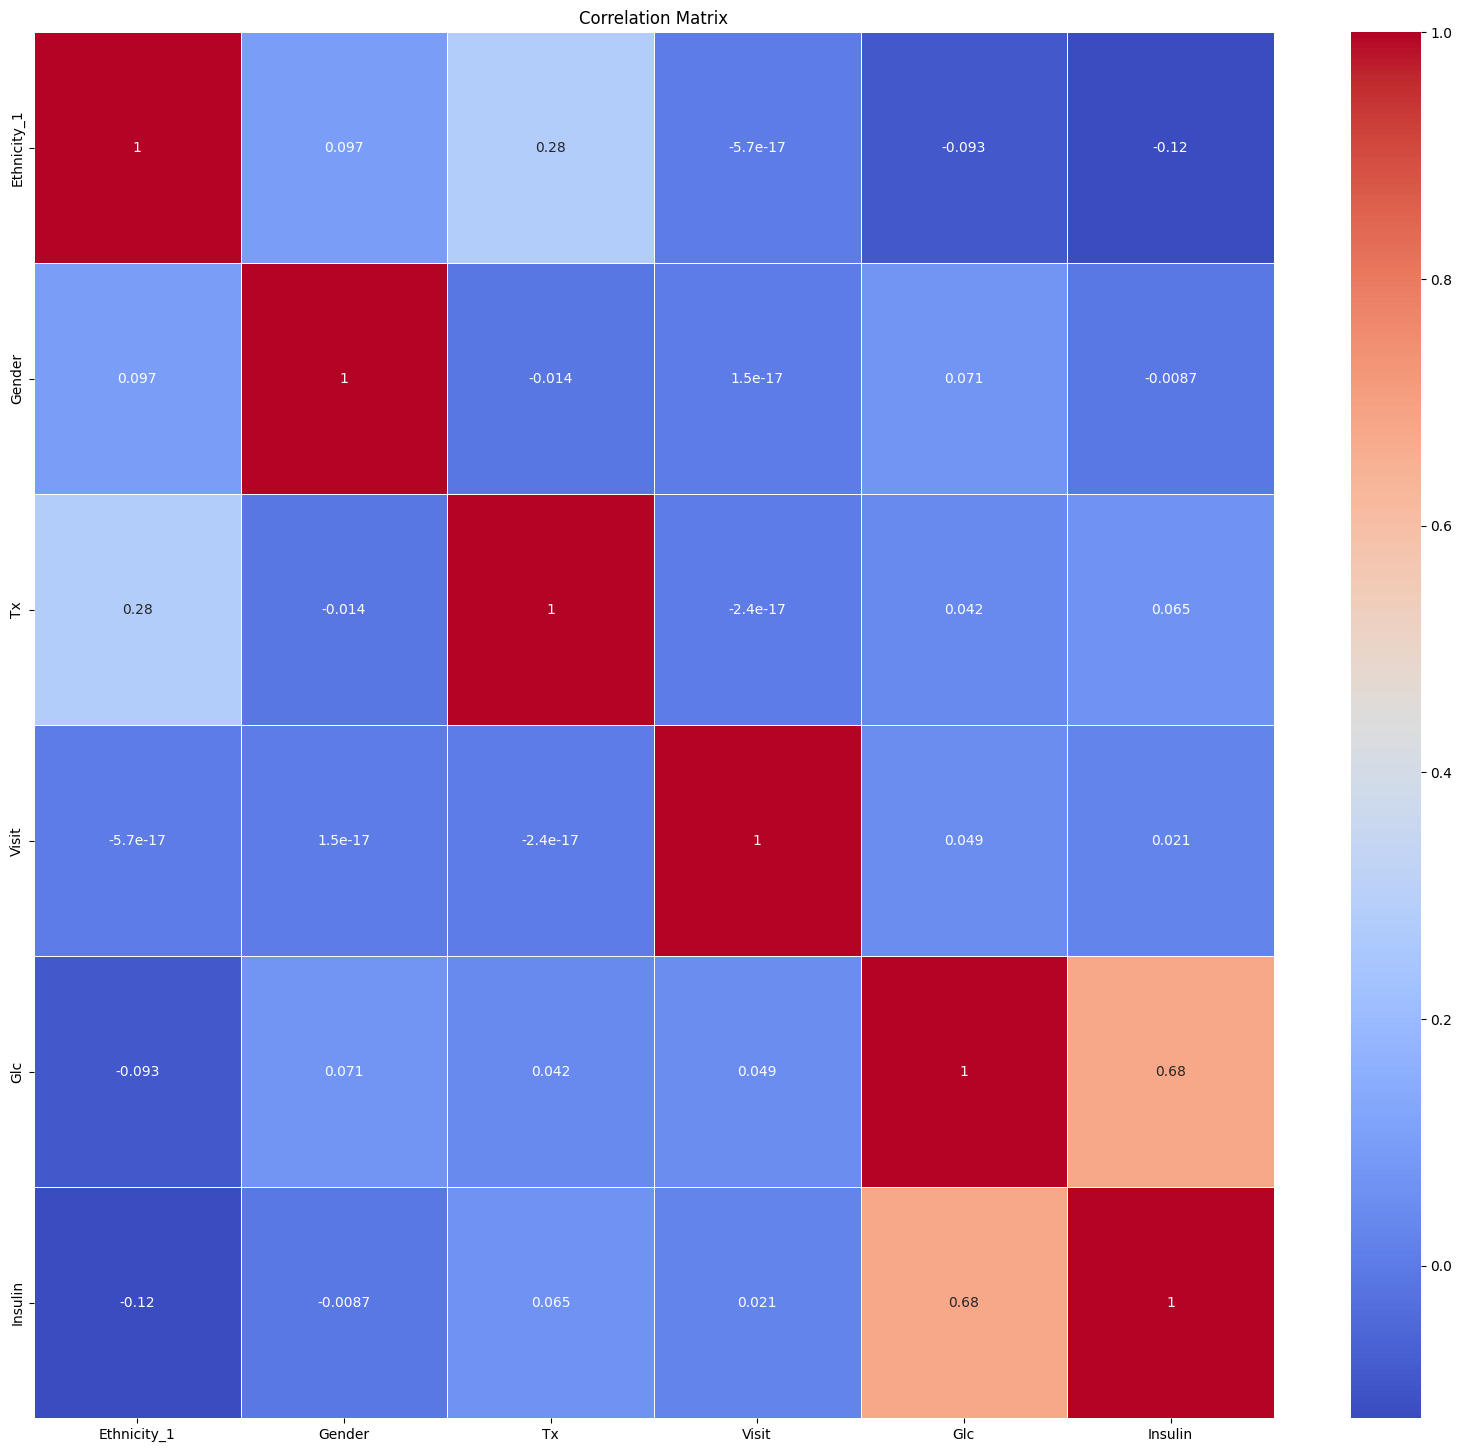

In [17]:
# function to calculate correlation matrix and plot it
def visualize_correlation_matrix(correlation_matrix):
    # Create a heatmap using seaborn
    plt.figure(figsize=(20, 18))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

# Calculate correlation matrix
correlation_matrix = normalized_df.corr()
# visualize
visualize_correlation_matrix(correlation_matrix)


### identify strong correlations

In [22]:
def identify_strong_correlations(correlation_matrix, threshold=0.7):
    # Find the indices of strongly correlated features
    n_features = correlation_matrix.shape[0]
    strongly_correlated = []
    
    for i in range(n_features):
        for j in range(i+1, n_features):
            if abs(correlation_matrix.iloc[i, j]) >= threshold:
                strongly_correlated.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
    
    return strongly_correlated

# Set a correlation threshold
threshold = 0.5

# Find strongly correlated features
strong_correlations = identify_strong_correlations(correlation_matrix, threshold)
strong_correlations_df = pd.DataFrame(strong_correlations, columns=['feature1','feature2','correlation'])
strong_correlations_df


,feature1,feature2,correlation
0,Glc,Insulin,0.676023


### Perform Spearman correlations

C:\Users\User\AppData\Local\Temp\ipykernel_19704\3496157518.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr_matrix = df.corr(method='spearman')


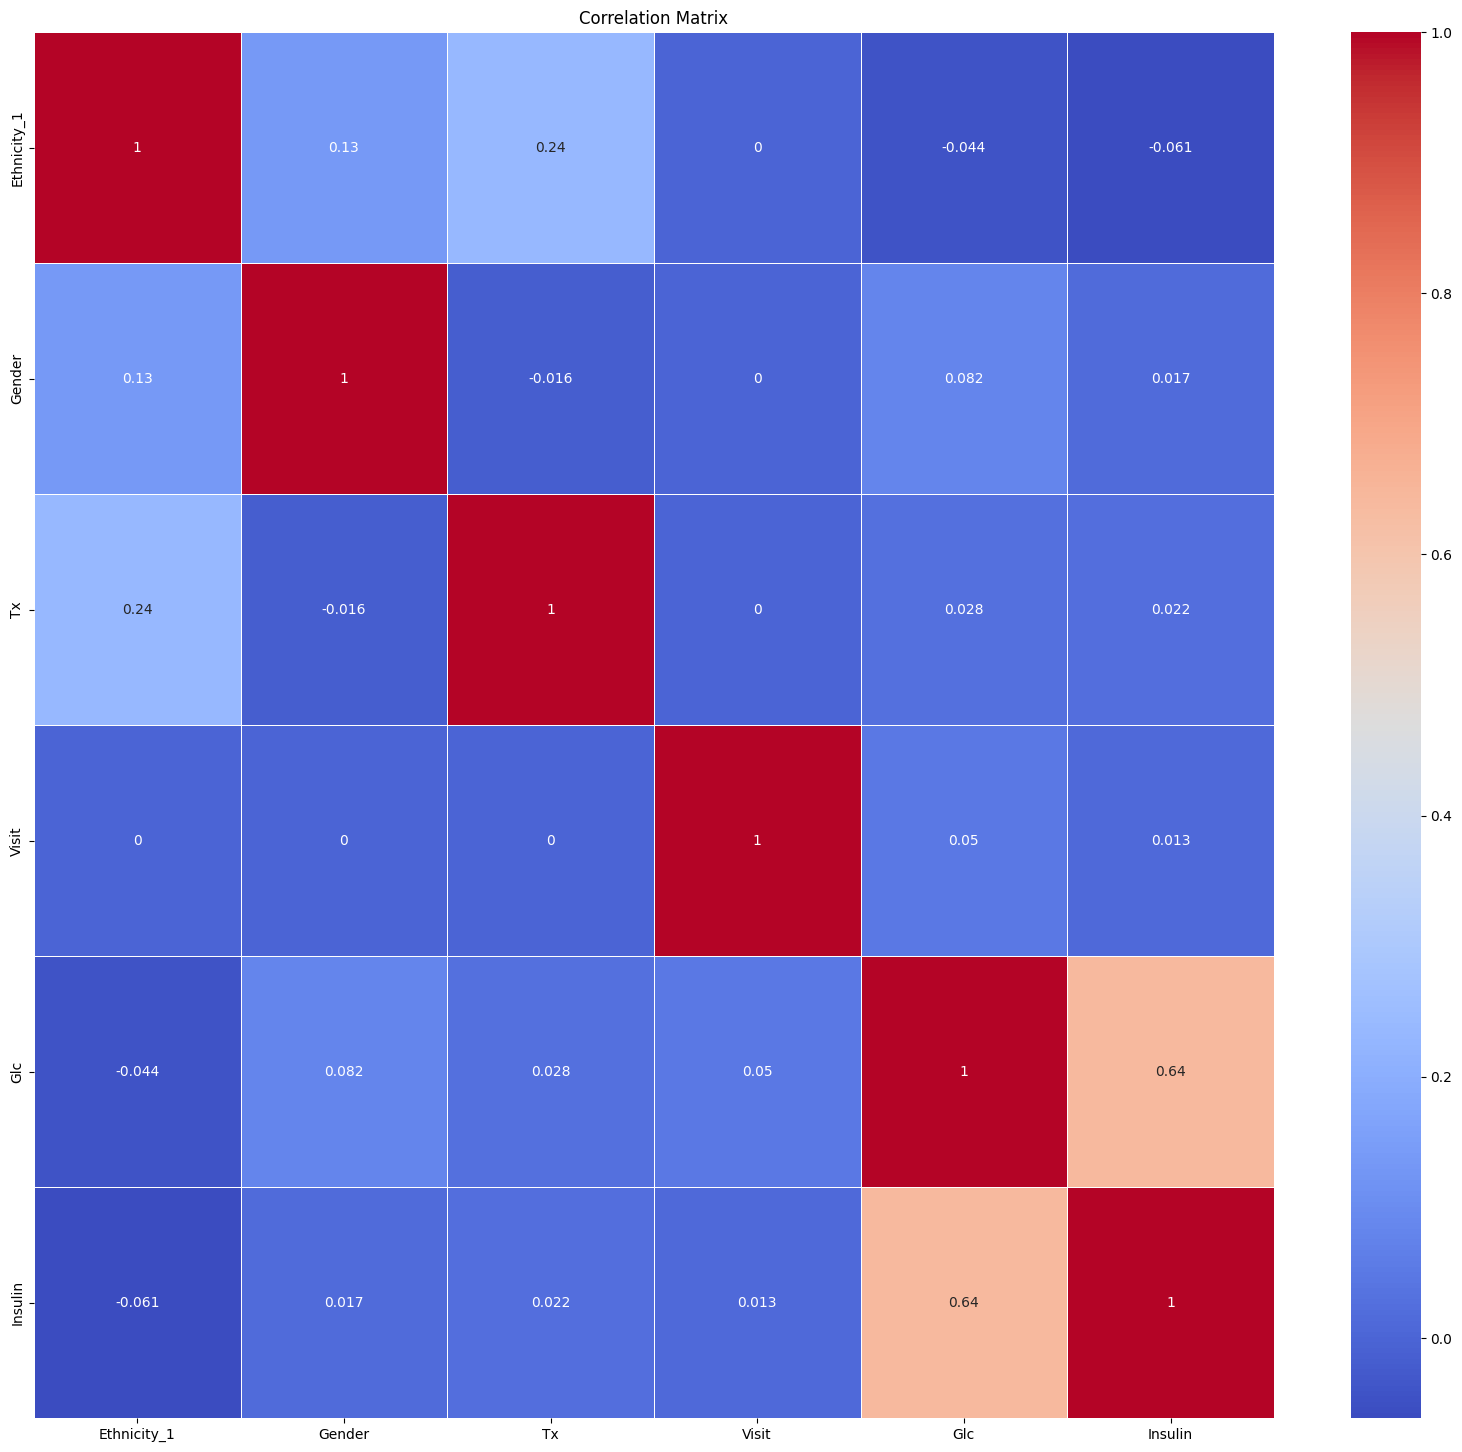

In [23]:
def calculate_spearman_correlation(df):
    # Calculate the Spearman correlation matrix
    spearman_corr_matrix = df.corr(method='spearman')
    
    return spearman_corr_matrix

spearman_corr_matrix = calculate_spearman_correlation(normalized_df)

# visualize
visualize_correlation_matrix(spearman_corr_matrix)

In [24]:
# Find strongly correlated features in spearman
strong_correlations = identify_strong_correlations(spearman_corr_matrix, threshold)
strong_correlations_df = pd.DataFrame(strong_correlations, columns=['feature1_spear','feature2_spear','correlation'])
strong_correlations_df


,feature1_spear,feature2_spear,correlation
0,Glc,Insulin,0.641947
